In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [7]:
# Save references to each table

Measurement = Base.classes.measurement

Station = Base.classes.station



In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
session.close()

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

# measurement_recent_time = session.query(Measurement).first()

# measurement_recent_time.__dict__


recent_time = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

recent_time



('2017-08-23',)

In [11]:
good_date = list(np.ravel(recent_time))[0]

good_date

'2017-08-23'

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 



# Starting from the most recent data point in the database. 

most_recent_data = dt.datetime.strptime(good_date, '%Y-%m-%d')

# most_recent_data = most_recent_data.date()

# dates.append(most_recent_data)

most_recent_data

datetime.datetime(2017, 8, 23, 0, 0)

In [13]:
# # Design a query to retrieve the last 12 months of precipitation data and plot the results. 


# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.

year_data = most_recent_data - dt.timedelta(days=365)
year_data

datetime.datetime(2016, 8, 23, 0, 0)

In [14]:
# Perform a query to retrieve the data and precipitation scores

year_data = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= year_data).\
    filter(Measurement.date <= most_recent_data).all()

year_data

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column

measure_year = pd.DataFrame(year_data, columns = ["Date", "Precipitation"])

measure_year.set_index('Date', inplace=True)

measure_year


,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [16]:
# Sort the dataframe by date

measure_year.sort_index()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


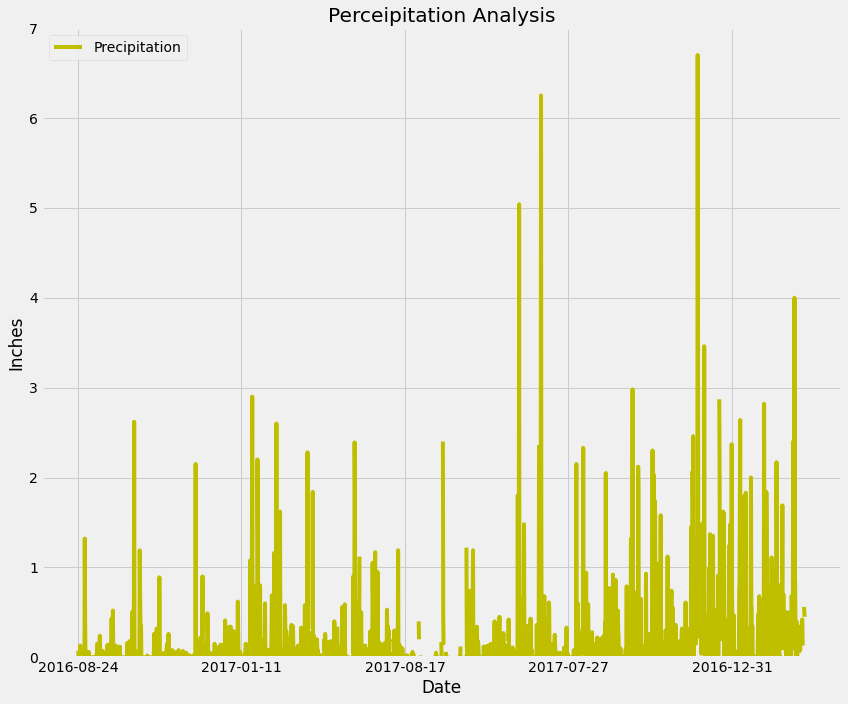

<Figure size 432x288 with 0 Axes>

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

measure_year.plot(color = 'y', figsize=(12,10), ylim=(0,7))
plt.title('Perceipitation Analysis')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()
plt.savefig('Perceipitation Analysis.png')

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data

per_year_data = measure_year['Precipitation']

per_year_data.describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
station_query = session.query(Station.station).count()

station_query

9

In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_query = session.query(Measurement.station,func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()

active_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

active_describe_station = session.query(Measurement,
                                       func.max(Measurement.tobs).label('max_temp'),
                                       func.min(Measurement.tobs).label('min_temp'),
                                       func.avg(Measurement.tobs).label('avg_temp'),
                                       Station.name.label('sta_name')).\
                                join(Station, Measurement.station==Station.station).\
                                filter(Measurement.station == 'USC00519281').\
                                first()

active_describe_station

(<sqlalchemy.ext.automap.measurement object at 0x000002AAC6024DF0>, 85.0, 54.0, 71.66378066378067, 'WAIHEE 837.5, HI US')

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
year_temp_query = session.query(Measurement.station,Measurement.tobs)\
    .filter(Measurement.date >= '2016-08-23')\
    .filter(Measurement.date <= '2017-08-23')\
    .filter(Measurement.station == 'USC00519281').all()

year_temp_query

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

In [23]:
year_temp_query_df = pd.DataFrame(year_temp_query, columns=['Station', 'Temp. Observations'])
year_temp_query_df

,Station,Temp. Observations
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0
...,...,...
347,USC00519281,77.0
348,USC00519281,77.0
349,USC00519281,76.0
350,USC00519281,76.0


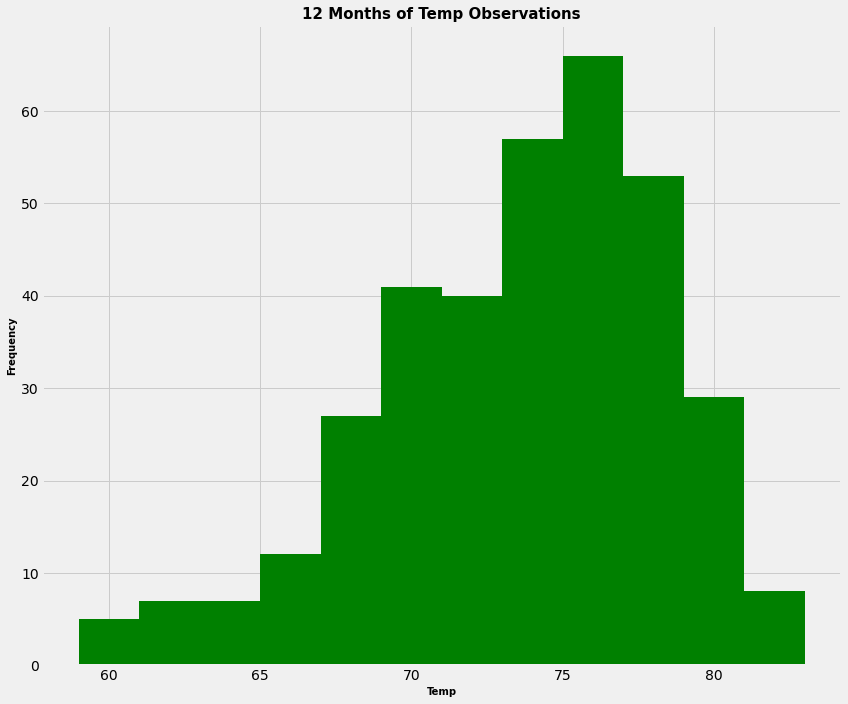

In [24]:
# Plot the results as a histogram

year_temp_query_df['Temp. Observations'].hist(bins=12, color='green', figsize=(12,10))
plt.title('12 Months of Temp Observations', weight='bold', size=15)
plt.xlabel('Temp', weight='bold', size=10)
plt.ylabel('Frequency', weight='bold', size=10)
plt.tight_layout()
plt.savefig('12_Months_of_Temp_Obs.png')
plt.show()

# Close session

In [25]:
# Close Session
session.close()